In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [4]:
# Step 1: Load Boston Housing Dataset from OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data[["LSTAT"]].values  # % lower status of the population
y = boston.target.values          # Median value of owner-occupied homes


In [5]:
# Step 2: Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 3: Polynomial Feature Transformation
degree = 3  # Change this for different polynomial orders
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [5]:
# Step 4: Train the Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [6]:
# Step 5: Predict and Evaluate
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Degree {degree}): {mse:.4f}")


Mean Squared Error (Degree 3): 25.2840


In [7]:
# Step 6: Visualization
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)


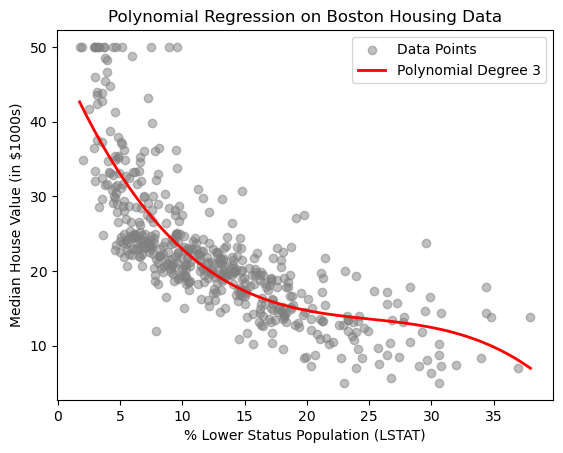

In [8]:
plt.scatter(X, y, color='gray', alpha=0.5, label='Data Points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Polynomial Degree {degree}')
plt.xlabel('% Lower Status Population (LSTAT)')
plt.ylabel('Median House Value (in $1000s)')
plt.title('Polynomial Regression on Boston Housing Data')
plt.legend()
plt.show()
